# Polynomial Regression
**Polynomial Regression** is used to model non linear relationships/ find patterns in non linear data (data with little to no correlation).

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Generating a non-linaer dataset
X = 6 * np.random.rand(100, 1) - 3
# Quadratic Equation
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)

Text(0, 0.5, 'y Dataset')

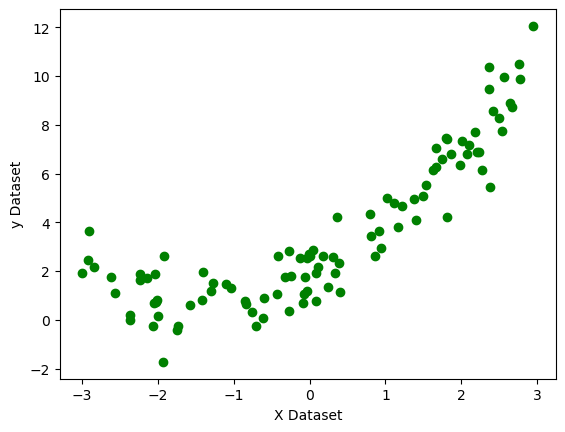

In [7]:
plt.scatter(X, y, color = "g")
plt.xlabel("X Dataset")
plt.ylabel("y Dataset")

In [16]:
X.shape, y.shape

((100, 1), (100, 1))

In [24]:
# Checking the correlation
df = pd.DataFrame()
df["X"] = pd.DataFrame(X)
df["y"] = pd.DataFrame(y)
df.corr()

,X,y
X,1.000000,0.842136
y,0.842136,1.000000


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
#3 Implementging simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [27]:
regression_1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
score

0.7557578643933685

Text(0, 0.5, 'y Dataset')

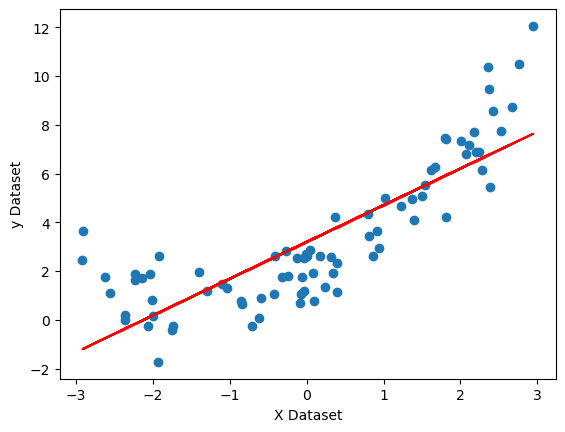

In [30]:
## Visualizing the model
plt.plot(X_train, regression_1.predict(X_train), color = "r")
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("y Dataset")
## By inspecting this best fit line,we can see that we will be getting a lotof errors

In [33]:
## With polynomial regression, if it does not work with your initial degree value
## just keep increasing the polynomial degree value until the model perform well
# We wil apply polynomial transformations
from sklearn.preprocessing import PolynomialFeatures
#Include_bias means include 1 (which is B0 in the quadratic equation)
poly = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) # No fit to avoid data leakage

In [34]:
X_train_poly

array([[ 1.00000000e+00,  1.66983814e+00,  2.78835942e+00],
       [ 1.00000000e+00,  2.20061411e+00,  4.84270247e+00],
       [ 1.00000000e+00,  8.95404897e-02,  8.01749930e-03],
       [ 1.00000000e+00,  3.37016565e-01,  1.13580165e-01],
       [ 1.00000000e+00,  3.63362613e-01,  1.32032389e-01],
       [ 1.00000000e+00,  2.10536446e+00,  4.43255951e+00],
       [ 1.00000000e+00,  3.12692297e-01,  9.77764726e-02],
       [ 1.00000000e+00, -2.14336856e+00,  4.59402880e+00],
       [ 1.00000000e+00,  8.03511406e-02,  6.45630580e-03],
       [ 1.00000000e+00, -5.94471564e-01,  3.53396440e-01],
       [ 1.00000000e+00,  9.38184818e-01,  8.80190753e-01],
       [ 1.00000000e+00,  1.22257790e+00,  1.49469672e+00],
       [ 1.00000000e+00, -2.23367454e+00,  4.98930195e+00],
       [ 1.00000000e+00, -2.55695085e+00,  6.53799764e+00],
       [ 1.00000000e+00,  1.02250597e+00,  1.04551846e+00],
       [ 1.00000000e+00, -2.61549412e+00,  6.84080949e+00],
       [ 1.00000000e+00, -4.08726214e-01

In [35]:
# Once you have the new data you can apply the linear regression model to it
# and get better results
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.9691079724252505

In [36]:
# There are 3 coefficients because we now have three features
regression.coef_

array([[0.        , 1.47398109, 0.51636683]])

In [37]:
regression.intercept_

array([1.83481965])

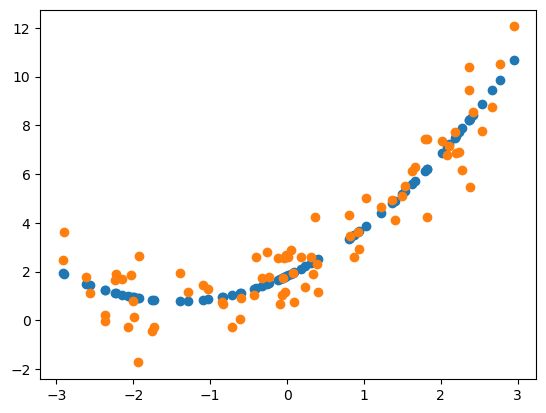

In [39]:
# Visualizing the best fit line to see if it has improved
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [41]:
#The plot above shows amazing improvement
#Now I will test to see what will happen if I make the degree = 3 instead of 2
#Include_bias means include 1 (which is B0 in the quadratic equation)
poly3 = PolynomialFeatures(degree = 3, include_bias = True)
X_train_poly = poly3.fit_transform(X_train)
X_test_poly = poly3.transform(X_test) # No fit to avoid data leakage

In [42]:
# now we have 4 features
X_train_poly

array([[ 1.00000000e+00,  1.66983814e+00,  2.78835942e+00,
         4.65610891e+00],
       [ 1.00000000e+00,  2.20061411e+00,  4.84270247e+00,
         1.06569194e+01],
       [ 1.00000000e+00,  8.95404897e-02,  8.01749930e-03,
         7.17890814e-04],
       [ 1.00000000e+00,  3.37016565e-01,  1.13580165e-01,
         3.82783971e-02],
       [ 1.00000000e+00,  3.63362613e-01,  1.32032389e-01,
         4.79756337e-02],
       [ 1.00000000e+00,  2.10536446e+00,  4.43255951e+00,
         9.33215325e+00],
       [ 1.00000000e+00,  3.12692297e-01,  9.77764726e-02,
         3.05739498e-02],
       [ 1.00000000e+00, -2.14336856e+00,  4.59402880e+00,
        -9.84669690e+00],
       [ 1.00000000e+00,  8.03511406e-02,  6.45630580e-03,
         5.18771535e-04],
       [ 1.00000000e+00, -5.94471564e-01,  3.53396440e-01,
        -2.10084134e-01],
       [ 1.00000000e+00,  9.38184818e-01,  8.80190753e-01,
         8.25781602e-01],
       [ 1.00000000e+00,  1.22257790e+00,  1.49469672e+00,
      

In [43]:
# Once you have the new data you can apply the linear regression model to it
# and get better results
regression_3 = LinearRegression()
regression_3.fit(X_train_poly, y_train)
y_pred = regression_3.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.9704233280203862

In [46]:
# There was a minor increase which was good, not crazy impactful so you can get away with
## degree = 2 for this dastaset if you really want to 

# Feeding new data to the model
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly3.transform(X_new)

In [50]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

In [51]:
y_pred_new = regression_3.predict(X_new_poly)
y_pred_new

array([[ 2.31188808],
       [ 2.24932561],
       [ 2.18804952],
       [ 2.12805629],
       [ 2.06934241],
       [ 2.01190434],
       [ 1.95573859],
       [ 1.90084162],
       [ 1.84720991],
       [ 1.79483994],
       [ 1.74372821],
       [ 1.69387117],
       [ 1.64526533],
       [ 1.59790714],
       [ 1.55179311],
       [ 1.5069197 ],
       [ 1.46328339],
       [ 1.42088068],
       [ 1.37970803],
       [ 1.33976192],
       [ 1.30103885],
       [ 1.26353528],
       [ 1.2272477 ],
       [ 1.19217259],
       [ 1.15830642],
       [ 1.12564569],
       [ 1.09418686],
       [ 1.06392642],
       [ 1.03486085],
       [ 1.00698663],
       [ 0.98030024],
       [ 0.95479816],
       [ 0.93047687],
       [ 0.90733285],
       [ 0.88536258],
       [ 0.86456254],
       [ 0.84492921],
       [ 0.82645908],
       [ 0.80914861],
       [ 0.7929943 ],
       [ 0.77799262],
       [ 0.76414005],
       [ 0.75143308],
       [ 0.73986817],
       [ 0.72944182],
       [ 0

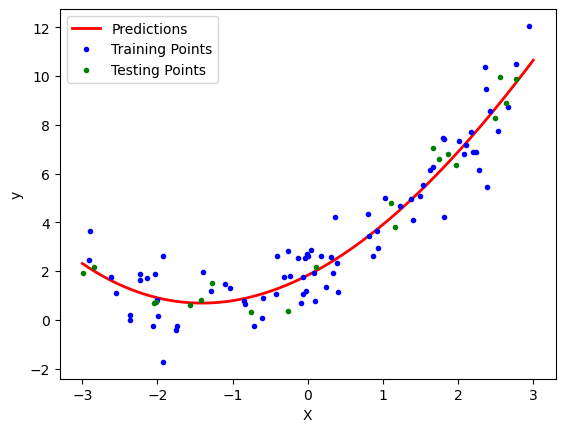

In [52]:
## Visualizing the predictions
plt.plot(X_new, y_pred_new, "r-", linewidth = 2, label = "Predictions")
plt.plot(X_train, y_train, "b.", label = "Training Points")
plt.plot(X_test, y_test, "g.", label = "Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()